In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split



In [2]:
# 数据集内容：每平方米价格，房间数，房价
# loading data
data = np.loadtxt('data1.txt',delimiter=',')
# npy: np.load_py
# excel: pd.read_excel
# csv: pd.read_csv

print(data.dtype)
num_feature = data.shape[1] - 1
data = data.astype('float32')

float64


In [3]:
def data_normalizetion(data): #数据归一化
    maximum = np.max(data,axis=0,keepdims=True) #对列求最大值
    minimun = np.min(data,axis=0,keepdims=True) #对列求最小值
    print('maximum:{},minimun:{}'.format(maximum,minimun))
    return (data - minimun)/(maximum - minimun)#数据标准化，使其在0-1的区间内，使其在所有方向都比较平均

# train val split
#train_test_split提供了多样化的接口
data_train, data_test = train_test_split(data, test_size=0.3, random_state=42)#训练集：测试集=7：3
data_train=data_normalizetion(data_train) # 划分数据集后再进行数据归一化，避免数据作弊
data_test=data_normalizetion(data_test)

X_train = data_train[:, :2] # 切片全部行和前两列
a=np.ones((X_train.shape[0],1))#返回给定形状和类型的新数组，并填充为1。
X_train = np.concatenate((X_train, np.ones((X_train.shape[0],1))), axis=1)#沿给定轴（行）连接一系列数组。用来表示偏移值b
y_train = data_train[:, 2]

X_test = data_test[:, :2]
X_test = np.concatenate((X_test, np.ones((X_test.shape[0],1))), axis=1)
y_test = data_test[:, 2]


maximum:[[4.478e+03 5.000e+00 6.999e+05]],minimun:[[8.520e+02 1.000e+00 1.699e+05]]
maximum:[[3.89e+03 4.00e+00 5.99e+05]],minimun:[[1.10e+03 2.00e+00 2.12e+05]]


In [4]:
np.set_printoptions(threshold=5)
print("data_train:\n{}\n\ndata_test:\n{}".format(data_train,data_test))

data_train:
[[1.         1.         1.        ]
 [0.10590182 0.5        0.05660377]
 [0.         0.25       0.01886792]
 ...
 [0.11472698 0.5        0.16981132]
 [0.3717595  0.5        0.57566035]
 [0.9274683  0.75       0.71528304]]

data_test:
[[0.51111114 0.5        0.6640827 ]
 [0.38064516 1.         0.19379845]
 [0.12831542 0.5        0.6524548 ]
 ...
 [0.15555556 0.5        0.26589146]
 [0.20215054 0.         0.40439278]
 [0.73010755 0.5        0.950646  ]]


In [5]:
# model init
w = np.random.rand(num_feature+1,1) #随机初始化权重w

# gradient descent
def L2_loss(y_pred,y):
    return np.mean(np.square(y_pred-y))

iterations = 10000
lr = 0.1


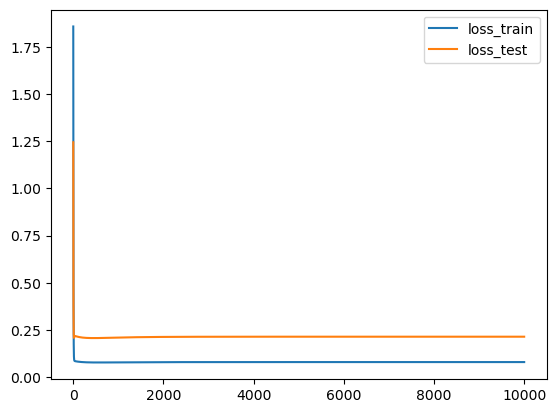

In [6]:
log = []
log_test = []
for i in range(iterations):
    y_pred = np.matmul(X_train, w)  # 两个矩阵相乘：w1x1+w2x2+...+wnxn
    term = lr*np.mean((y_pred-y_train.reshape(-1, 1))*X_train,  # 保证矩阵和矩阵运算，向量和向量运算
                      axis=0).reshape(-1, 1)  # 对代价函数求偏导，计算其梯度下降的值
    w -= term  # 更新梯度
    loss = L2_loss(y_pred, y_train)  # 计算其损失值
    # print('iter:{},loss:{}'.format(i,loss))
    log.append([i, loss])

    y_pred_test = np.matmul(X_test, w)
    loss_test = L2_loss(y_pred_test, y_test)
    # print('iter:{},val_loss:{}'.format(i,loss_test))
    log_test.append([i, loss_test])


log = np.array(log)
plt.plot(log[:, 0], log[:, 1])

log_test = np.array(log_test)
plt.plot(log_test[:, 0], log_test[:, 1])
plt.legend(["loss_train", "loss_test"])


In [8]:
# normal eqution 正规方程求解w
term = np.matmul(X_train.T, X_train)#矩阵相乘
term_inv = np.linalg.inv(term)# 求矩阵的逆
w = np.matmul(np.matmul(term_inv,X_train.T),y_train.reshape(-1,1)) # reshape(-1,1)保证矩阵和矩阵运算，向量和向量运算
print(w)


[[ 0.89707607]
 [-0.02132246]
 [ 0.01620799]]


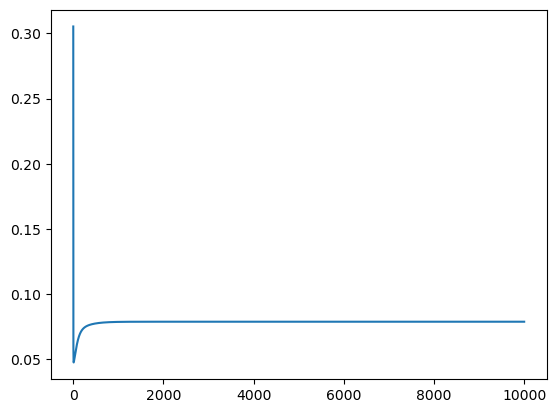

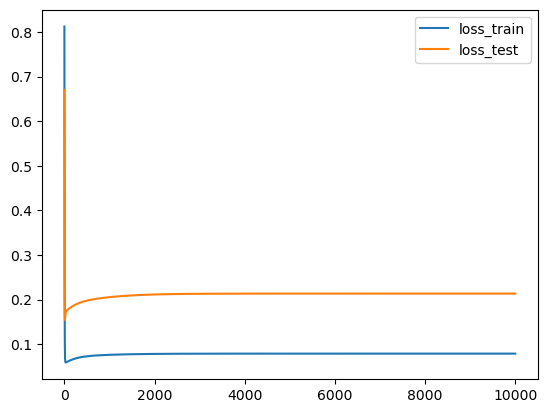

In [7]:
log = np.array(log)
plt.plot(log[:,0],log[:,1])

log_test = np.array(log_test)
plt.plot(log_test[:,0],log_test[:,1])
plt.legend(["loss_train","loss_test"])

In [72]:
# normal eqution 正规方程求解w
term = np.matmul(X_train.T, X_train)#矩阵相乘
term_inv = np.linalg.inv(term)
w = np.matmul(np.matmul(term_inv,X_train.T),y_train.reshape(-1,1))
print(w)

[[ 0.89707607]
 [-0.02132246]
 [ 0.01620799]]


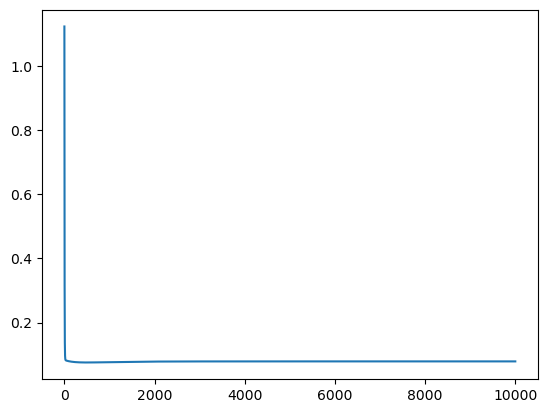

In [83]:
# loss curve visualization
log = np.array(log)
plt.plot(log[:,0],log[:,1])

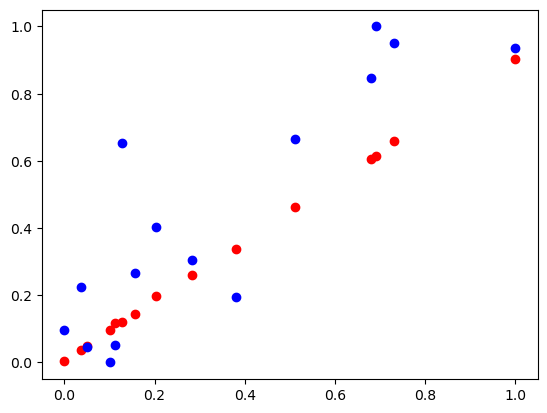

In [55]:
# visualization
y_pred = np.matmul(X_test, w)
plt.scatter(X_test[:,0],y_pred,c='r')
plt.scatter(X_test[:,0],y_test,c='b')

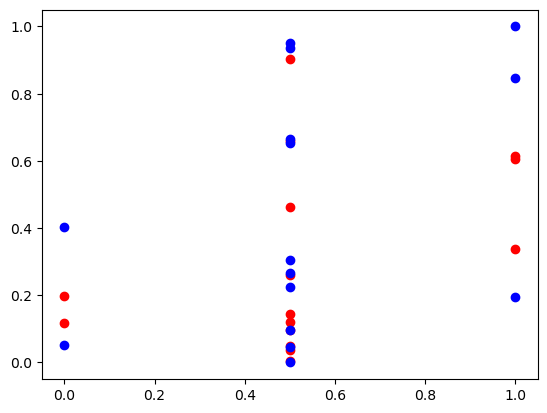

In [56]:
plt.scatter(X_test[:,1],y_pred,c='r')
plt.scatter(X_test[:,1],y_test,c='b')